# Pymaceuticals Inc.
---

### Comparing Capomulin to other Drugs

- I observe a  postitive correlation between weight of the mice and the tumor size. A P-Value of .84 indicates a linear correlation.
- Capomulin seems effective as a drug regimen to treat tumor as the tumor size in mouse l509 decreased as time went on.
- Of the drug regimens analyized, Capomulin and Ramicane were the most effective at decreasing tumor size. 
- As a call to action I would recommend advancing the two effective drugs to the next stages.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
duplicate_data = combined_data["Mouse ID"].count()

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
print(f"{duplicate_data} records in the experiment.")

combined_data

1893 records in the experiment.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_list = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep = False)]
print(f"Mice with more than one datapoint in a timepoint.\n")
print(duplicate_list[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]])

Mice with more than one datapoint in a timepoint.

    Mouse ID  Timepoint  Tumor Volume (mm3)
908     g989          0           45.000000
909     g989          0           45.000000
910     g989          5           48.786801
911     g989          5           47.570392
912     g989         10           51.745156
913     g989         10           49.880528
914     g989         15           51.325852
915     g989         15           53.442020
916     g989         20           55.326122
917     g989         20           54.657650


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
nodupe_data = combined_data.drop_duplicates(subset = ("Mouse ID", "Timepoint"), keep = "last")

record_check = nodupe_data["Mouse ID"].count()

print(f"There is a total of {record_check} records in this new dataframe.")

nodupe_data

There is a total of 1888 records in this new dataframe.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
nodupe_data['Mouse ID'].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_group = nodupe_data.groupby("Drug Regimen")
avg_tumor = round(regimen_group["Tumor Volume (mm3)"].mean(),2)
med_tumor = round(regimen_group["Tumor Volume (mm3)"].median(),2)
var_tumor = round(regimen_group["Tumor Volume (mm3)"].var(),2)
std_tumor = round(regimen_group["Tumor Volume (mm3)"].std(),2)
sem_tumor = round(regimen_group["Tumor Volume (mm3)"].sem(),2)

tumor_summary_df = pd.DataFrame({"Average" : avg_tumor, "Median" : med_tumor,
                                "Variance" : var_tumor, "Standard Deviation" : std_tumor,
                                "Standard Error" : sem_tumor})
print(tumor_summary_df)

              Average  Median  Variance  Standard Deviation  Standard Error
Drug Regimen                                                               
Capomulin       40.68   41.56     24.95                4.99            0.33
Ceftamin        52.59   51.78     39.29                6.27            0.47
Infubinol       52.88   51.82     43.13                6.57            0.49
Ketapril        55.24   53.70     68.55                8.28            0.60
Naftisol        54.33   52.51     66.17                8.13            0.60
Placebo         54.03   52.29     61.17                7.82            0.58
Propriva        52.38   50.78     43.22                6.57            0.53
Ramicane        40.22   40.67     23.49                4.85            0.32
Stelasyn        54.23   52.43     59.45                7.71            0.57
Zoniferol       53.24   51.82     48.53                6.97            0.52


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

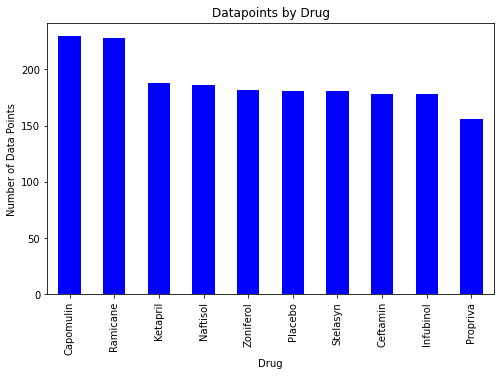

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

combined_data_regimen_group = nodupe_data.groupby("Drug Regimen")

bar_graph_info = combined_data_regimen_group["Timepoint"].count().sort_values(ascending = False)
bar_graph = bar_graph_info.plot(kind = "bar", color = "blue", figsize = (8,5))
bar_graph.set_title("Datapoints by Drug")
bar_graph.set_xlabel("Drug")
bar_graph.set_ylabel("Number of Data Points")
plt.show()

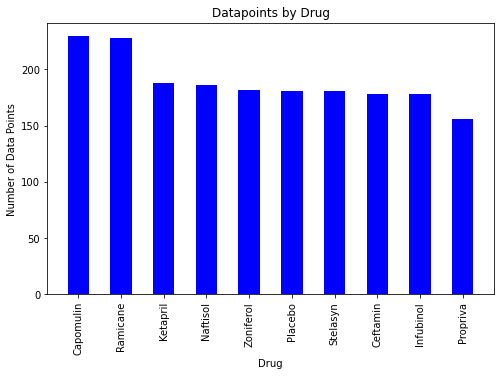

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(bar_graph_info))
tick_locations = [value for value in x_axis]

plt.figure(figsize = (8,5))
plt.bar(x_axis, bar_graph_info, color="blue", width = .5)
plt.xticks(tick_locations, bar_graph_info.index, rotation="vertical")
plt.title("Datapoints by Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Data Points")
plt.show()

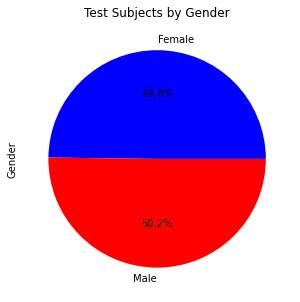

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_data_gender_group = nodupe_data.groupby("Sex")

pie_chart_info = combined_data_gender_group["Mouse ID"].nunique()
pie_chart = pie_chart_info.plot(kind = "pie", y = pie_chart_info, colors = {"red", "blue"}, autopct="%1.1f%%", figsize = (5,5))
pie_chart.set_title("Test Subjects by Gender")
pie_chart.set_ylabel("Gender")
plt.show()


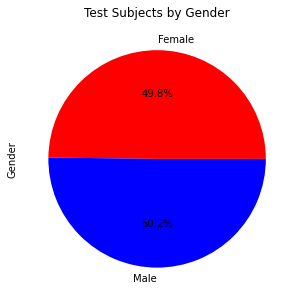

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = pie_chart_info.index
colors = ["red", "blue"]
plt.figure(figsize = (5,5))
plt.pie(pie_chart_info, labels = pie_labels, colors=colors, autopct="%1.1f%%")
plt.title("Test Subjects by Gender")
plt.ylabel("Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Final_Tumor_Size = nodupe_data.drop_duplicates(subset = ("Mouse ID"), keep = "last")
Final_Tumor_by_drug = Final_Tumor_Size[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
Final_Tumor_Size_Capomulin = Final_Tumor_by_drug.loc[Final_Tumor_by_drug["Drug Regimen"] == "Capomulin"]
Final_Tumor_Size_Ramicane = Final_Tumor_by_drug.loc[Final_Tumor_by_drug["Drug Regimen"] == "Ramicane"]
Final_Tumor_Size_Infubinol = Final_Tumor_by_drug.loc[Final_Tumor_by_drug["Drug Regimen"] == "Infubinol"]
Final_Tumor_Size_Ceftamin = Final_Tumor_by_drug.loc[Final_Tumor_by_drug["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
box_plot_df = pd.DataFrame({"Capomulin" : Final_Tumor_Size_Capomulin["Tumor Volume (mm3)"],
                            "Ramicane" : Final_Tumor_Size_Ramicane["Tumor Volume (mm3)"],
                           "Infubinol" : Final_Tumor_Size_Infubinol["Tumor Volume (mm3)"],
                        "Ceftamin" : Final_Tumor_Size_Ceftamin["Tumor Volume (mm3)"]})

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    
    # add subset     
    
    # Determine outliers using upper and lower bounds
avg_tumor_size_final = round(box_plot_df.mean(),2)
quartiles = round(box_plot_df.quantile([.25,.5,.75]),2)
lower_q = quartiles.loc[.25]
upper_q = quartiles.loc[.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)
outlier_df = pd.DataFrame({"Lower Bound" : lower_bound, "Upper Bound" : upper_bound})

print(f"Average Final Tumor Size\n\n{avg_tumor_size_final}\n\n")

print(f"Tumor Size Quartiles\n\n{quartiles}\n\n")

print(f"Anything outside of these ranges is considered an outlier\n\n{outlier_df}\n\n")

Capomulin_outlier = Final_Tumor_Size_Capomulin.loc[(Final_Tumor_Size_Capomulin["Tumor Volume (mm3)"] <= outlier_df.loc["Capomulin", "Lower Bound"]) |
                                                   (Final_Tumor_Size_Capomulin["Tumor Volume (mm3)"] >= outlier_df.loc["Capomulin", "Upper Bound"])]
Ramicane_outlier = Final_Tumor_Size_Ramicane.loc[(Final_Tumor_Size_Ramicane["Tumor Volume (mm3)"] <= outlier_df.loc["Ramicane", "Lower Bound"]) |
                                                   (Final_Tumor_Size_Ramicane["Tumor Volume (mm3)"] >= outlier_df.loc["Ramicane", "Upper Bound"])]
Infubinol_outlier = Final_Tumor_Size_Infubinol.loc[(Final_Tumor_Size_Infubinol["Tumor Volume (mm3)"] <= outlier_df.loc["Infubinol", "Lower Bound"]) |
                                                   (Final_Tumor_Size_Infubinol["Tumor Volume (mm3)"] >= outlier_df.loc["Infubinol", "Upper Bound"])]
Ceftamin_outlier = Final_Tumor_Size_Ceftamin.loc[(Final_Tumor_Size_Ceftamin["Tumor Volume (mm3)"] <= outlier_df.loc["Ceftamin", "Lower Bound"]) |
                                                   (Final_Tumor_Size_Ceftamin["Tumor Volume (mm3)"] >= outlier_df.loc["Ceftamin", "Upper Bound"])]

outlier_list = pd.concat([Capomulin_outlier, Ramicane_outlier, Infubinol_outlier, Ceftamin_outlier])

print(f"Below is a list of all outliers\n\n{outlier_list}")

Average Final Tumor Size

Capomulin    36.67
Ramicane     36.19
Infubinol    58.18
Ceftamin     57.75
dtype: float64


Tumor Size Quartiles

      Capomulin  Ramicane  Infubinol  Ceftamin
0.25      32.38     31.56      54.05     48.72
0.50      38.13     36.56      60.17     59.85
0.75      40.16     40.66      65.53     64.30


Anything outside of these ranges is considered an outlier

           Lower Bound  Upper Bound
Capomulin        20.71        51.83
Ramicane         17.91        54.31
Infubinol        36.83        82.75
Ceftamin         25.35        87.67


Below is a list of all outliers

    Mouse ID Drug Regimen  Tumor Volume (mm3)
669     c326    Infubinol           36.321346


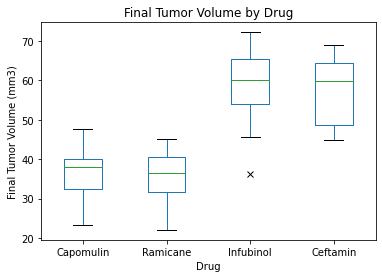

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_circle = dict(markerfacecolor = "blue", marker = "x")
fig, myboxplot = plt.subplots()
myboxplot = box_plot_df.boxplot(column = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], grid = False,
                                flierprops = red_circle,)
plt.title("Final Tumor Volume by Drug")
plt.xlabel("Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

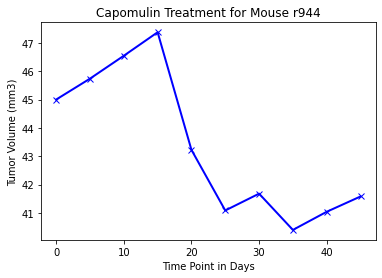

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
IndMouse = nodupe_data.loc[nodupe_data["Mouse ID"] == "r944"]
x_timepoint = IndMouse["Timepoint"]
y_tumor_volume = IndMouse["Tumor Volume (mm3)"]
plt.plot(x_timepoint, y_tumor_volume, color = "blue", marker = "x", markerfacecolor = "red", linewidth = 2)
plt.title(f"Capomulin Treatment for Mouse r944")
plt.xlabel("Time Point in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


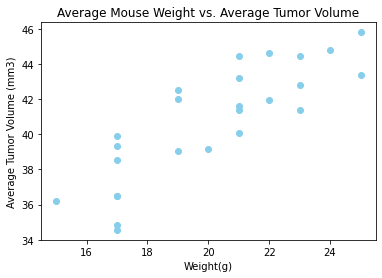

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Tests = nodupe_data.loc[nodupe_data["Drug Regimen"] == "Capomulin"]
Capomulin_subjects_avgs = Capomulin_Tests.groupby("Mouse ID").mean()
avg_weight = Capomulin_subjects_avgs["Weight (g)"]
avg_tumor_volume = Capomulin_subjects_avgs["Tumor Volume (mm3)"]

plt.scatter(avg_weight, avg_tumor_volume, facecolor = "skyblue")
plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

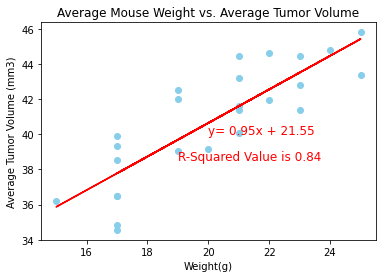

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, y_int, r_value, p_value, std_err = st.linregress(avg_weight, avg_tumor_volume)

fit = avg_weight * slope  + y_int
equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))
r_square = "R-Squared Value is " + str(round(r_value,2))
plt.scatter(avg_weight, avg_tumor_volume, facecolor = "skyblue")
plt.plot(avg_weight, fit, color = "red")
plt.annotate(equation, (20, 40), color = "red", fontsize = 12)
plt.annotate(r_square, (19, 38.5), color = "red", fontsize = 12)
plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
